In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
proj = '40Ar'
trg = '165Ho'
cn = '205At'
bf = 0.81
ch = 'xn'
sigr = 3.3
bf_diff = 0.01

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df10_mb

,E_lab,E*/MeV,196At,197At,198At,199At,200At,201At,202At,203At,204At,205At
0,145.765,30.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,6.440000e-08,0.000001,7.180000e-09,6.860000e-12
1,147.007,31.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,1.060000e-06,0.000007,2.200000e-08,1.760000e-11
2,148.249,32.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,1.120000e-05,0.000032,6.430000e-08,4.140000e-11
3,149.492,33.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,9.120000e-05,0.000140,1.800000e-07,8.630000e-11
4,150.734,34.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,6.160000e-04,0.000560,4.900000e-07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
106,277.462,136.0,0.000611,0.000092,1.280000e-07,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
107,278.704,137.0,0.000502,0.000062,6.370000e-08,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
108,279.946,138.0,0.000411,0.000041,3.280000e-08,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
109,281.189,139.0,0.000335,0.000026,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00


## Experimental values with errors

In [11]:
# Andreyev ub
e_lab = [175.6,180,182,185.5,189.3,195,198.5,200,202.9,207,211,219,224.8,231.5,237,241.4,248.9,256.3,263.8,271.3,279.5]
exp = [[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,1,1.4,3,3.5,1.7,1,np.nan], [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,15,35,28,25,31,16,4,1.5,0.8,np.nan], [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,35,100,300,350,370,160,150,35,56,17,9,np.nan,np.nan,np.nan], [np.nan,np.nan,100,460,850,1170,1930,1620,1950,800,320,100,20,28,np.nan,10,np.nan,np.nan,np.nan,np.nan,np.nan], [2430,9300,8250,11500,8800,4650,2600,1700,1250,350,210,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
exp = np.array(exp)/1e3

## Scaling of the values to mb, ub or nb

In [12]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb
bf_low_10 = bf_low_10_mb
bf_high_10 = bf_high_10_mb
bf_low_0 = bf_low_0_mb
bf_high_0 = bf_high_0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = mb
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale
bf_low_10.iloc[:,2:] = bf_low_10_mb.iloc[:,2:] * scale
bf_high_10.iloc[:,2:] = bf_high_10_mb.iloc[:,2:] * scale
bf_low_0.iloc[:,2:] = bf_low_0_mb.iloc[:,2:] * scale
bf_high_0.iloc[:,2:] = bf_high_0_mb.iloc[:,2:] * scale
dfm10.describe()
exp = exp * scale

## Plotting

/tmp/ipykernel_219964/3970254286.py:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
/tmp/ipykernel_219964/3970254286.py:23: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)
/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


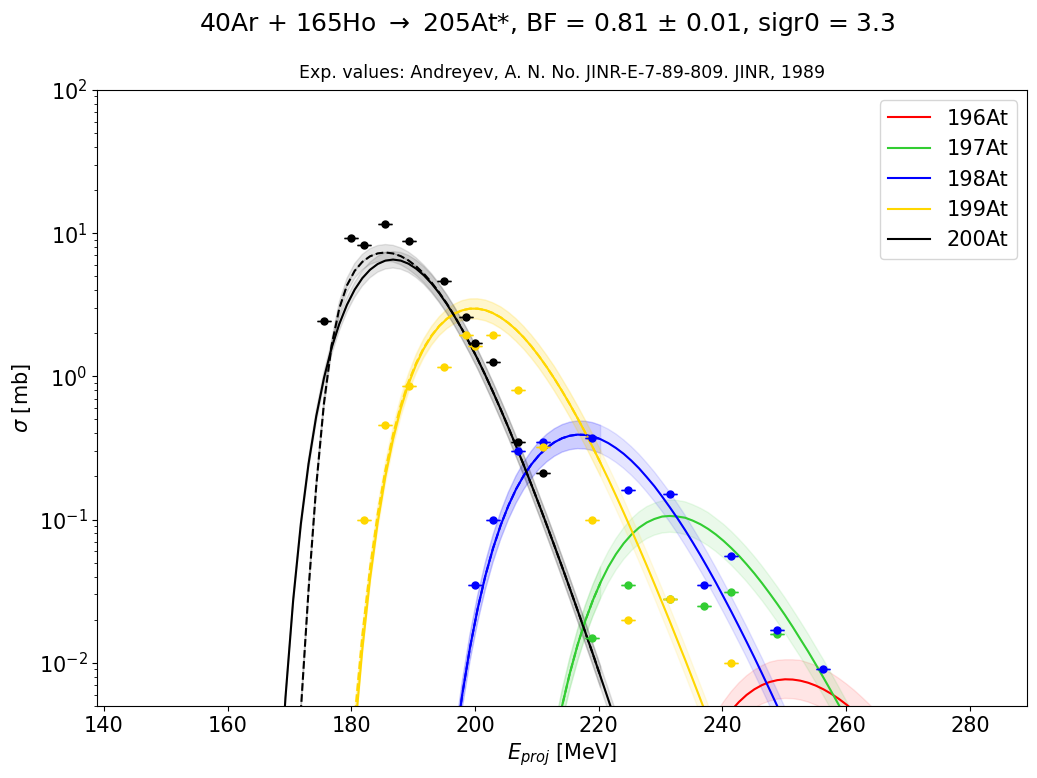

In [13]:
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']
sns.color_palette("dark")

plot_from = 0
plot_to = 5

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
plt.semilogy()
plt.ylim(5e-3, 1e2)
# plt.xlim(100, 145)
plt.suptitle(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr), va='top')
plt.title('Exp. values: Andreyev, A. N. No. JINR-E-7-89-809. JINR, 1989', va='bottom', fontsize='small')
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)

## assymetric errors
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=[err_min[i], err_max[i]], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)

# # symmetric errors
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=err[i], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)

# no errors        
for i in range(len(exp)):
    (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)
        
alpha_value = 0.1
for i in range(plot_from+2, len(df10.columns)-plot_to):
    plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_low_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
    plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_high_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
    plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_low_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
    plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_high_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)

plt.rcParams.update({'font.size': 15})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_Andreyev.png')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_Andreyev.pdf')